# 2.i.K means Clustering
## Name : Gobinath Periyasamy
## Roll No : CS21M501

In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sb
import sys

In [67]:
data = pd.read_csv("Dataset.csv",header = None,prefix= 'Component')

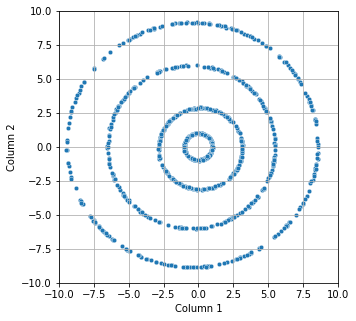

In [68]:
plt.figure(figsize = (5,5))
plt.grid()
plt.xlim(-10, 10)
plt.ylim(-10, 10)
sb.scatterplot(x = data['Component0'], y = data['Component1'], s =20, palette= 'Accent')
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.show()

In [69]:
n_clusters = 4
n_features = len(data.columns)
n_samples = len(data)
no_of_ran_init = 5
palette = ["rocket",'icefire','viridis','magma','Accent']

In [70]:
X = data.to_numpy()
def centroid_initialization(X , n_clusters):
    centroids = np.zeros((n_clusters, n_features))
    #initial assignment (random)
    for i in range(n_clusters):
        centroid_current_cluster = X[np.random.choice(range(n_samples))]
        centroids[i] = centroid_current_cluster

    return centroids

def cluster_assignment(X, centroids , n_clusters):
    current_clusters = [[] for i in range(n_clusters)]

    for index, data_point in enumerate(X):
        nearest_centroid = np.argmin(
            np.sqrt(np.sum((data_point - centroids) ** 2, axis=1))
        )
        current_clusters[nearest_centroid].append(index)

    return current_clusters

def update_centroids(X, current_clusters, n_clusters):
    centroids = np.zeros((n_clusters, n_features))
    for index, cluster in enumerate(current_clusters):
        new_centroid = np.mean(X[cluster], axis=0)
        centroids[index] = new_centroid

    return centroids

def plot( centroids):
    plt.scatter(X[:, 0], X[:, 1], color = 'green', label = 'data')
    plt.scatter(centroids[:-1, 0], centroids[:-1, 1],color = 'black', label = 'previous centroids')
    plt.scatter(centroids[-1, 0], centroids[-1, 1], color = 'red', label = 'next one centroid')
    plt.title('Select % d th centroid'%(centroids.shape[0]))
     
    #plt.legend()
#     plt.xlim(-5, 12)
#     plt.ylim(-10, 15)
    plt.show()
    
    
def distance(p1, p2):
    return np.sum((p1 - p2)**2)


def initialize_kmeans_plus(X, k):
    centroids = []
    centroids.append(X[np.random.choice(range(n_samples))])
    plot(np.array(centroids))
    ## compute remaining k - 1 centroids
    for c_id in range(k - 1):
         
        ## List to store distances of data from the nearest mean
        dist = []
        for i in range(X.shape[0]):
            point = X[i, :]
            d = sys.maxsize
             
            #finding closest centroid for 'point' from so far selected centroids 
            for j in range(len(centroids)):
                temp_dist = distance(point, centroids[j])
                d = min(d, temp_dist)
            dist.append(d)
             
        # select a data point as next centroid with probability proportional to above distance
        dist = np.array(dist)
        p = dist / np.sum(dist)
        index = np.random.choice(range(n_samples), p = p)
        next_centroid = X[index, :]
        #next_centroid = X[np.argmax(dist), :]
        centroids.append(next_centroid)
        dist = []
        plot( np.array(centroids))
    return centroids
  



K-Means Converged for Random Initialization 1


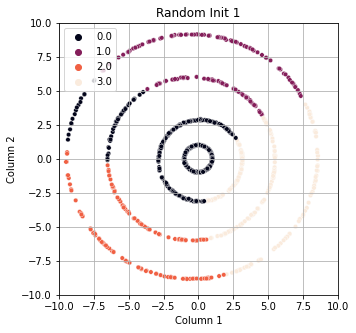

K-Means Converged for Random Initialization 2


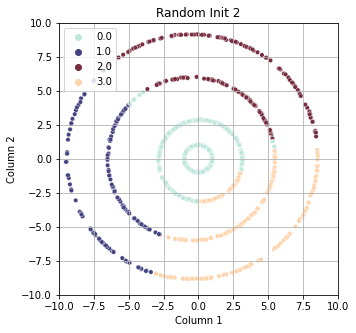

K-Means Converged for Random Initialization 3


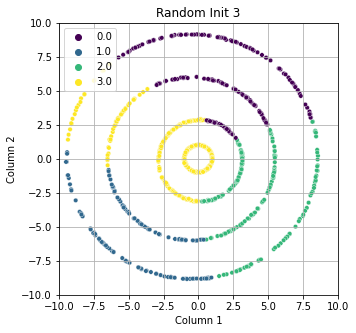

D:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Anaconda\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


K-Means Converged for Random Initialization 4


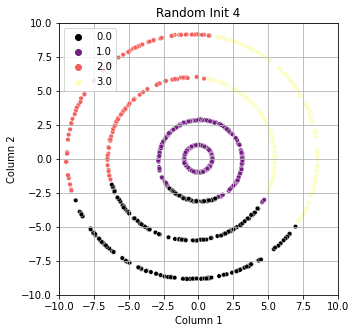

K-Means Converged for Random Initialization 5


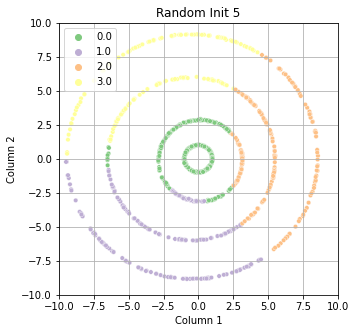

In [76]:

for i in range(no_of_ran_init):
    centroids = centroid_initialization(X, n_clusters)
    current_clusters = cluster_assignment(X , centroids, n_clusters)
    update_centroids(X , current_clusters, n_clusters)
    n_iter = 1000
    centroids = centroid_initialization(X, n_clusters)
    for it in range(n_iter):
        clusters = cluster_assignment(X, centroids,n_clusters)
        previous_centroids = centroids.copy()
        centroids = update_centroids(X, clusters,n_clusters)
        diff = centroids - previous_centroids
        if not diff.any():
            print("K-Means Converged for Random Initialization " + str(i+1))
            break
    y_pred = np.zeros(n_samples)
    for cluster_id, cluster in enumerate(clusters):
        for index in cluster:
            y_pred[index] = cluster_id
    #Visualization

    plt.figure(figsize = (5,5))
    plt.grid()
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    sb.scatterplot(x = X[:, 0], y =  X[:, 1], s =20, hue= y_pred, palette=palette[i] )
    plt.xlabel('Column 1')
    plt.ylabel('Column 2')
    plt.title('Random Init ' + str(i+1))
    plt.show()


array([[ 6.43022276,  0.10913245],
       [-0.24777893, -3.1591784 ],
       [-0.21759067,  0.86582828],
       [-2.43457735,  4.28346344]])

In [64]:
n_iter = n_samples
centroids = centroid_initialization(X, n_clusters)
for it in range(n_iter):
    clusters = cluster_assignment(X, centroids,n_clusters)
    previous_centroids = centroids.copy()
    centroids = update_centroids(X, clusters,n_clusters)
    diff = centroids - previous_centroids
    print(diff)
    if not diff.any():
        print("K-Means Converged")
        break

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
K-Means Converged


In [33]:
#Assigning clusters_ids to all data points
y_pred = np.zeros(n_samples)
for cluster_id, cluster in enumerate(clusters):
    for index in cluster:
        y_pred[index] = cluster_id

In [13]:
#y_pred

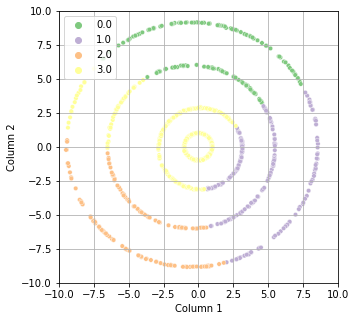

In [14]:
#Visualization

plt.figure(figsize = (5,5))
plt.grid()
plt.xlim(-10, 10)
plt.ylim(-10, 10)
sb.scatterplot(x = X[:, 0], y =  X[:, 1], s =20, hue= y_pred, palette= 'Accent')
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.show()


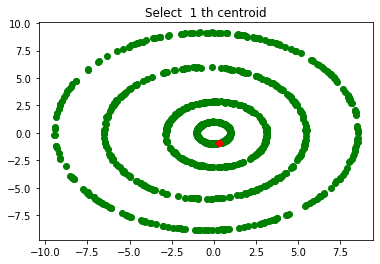

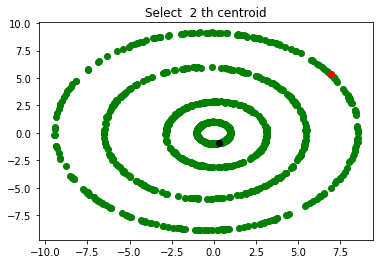

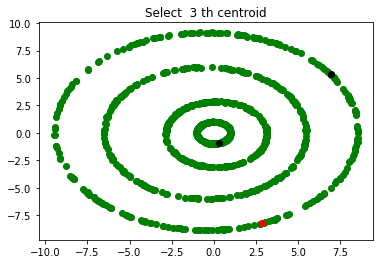

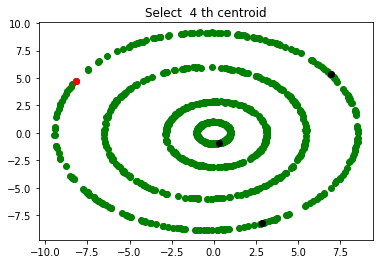

In [77]:
centroids = initialize_kmeans_plus(X, k = 4)

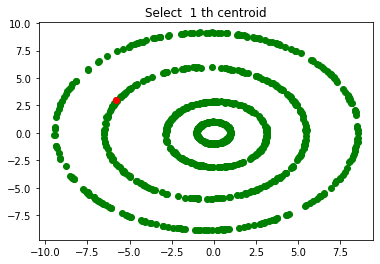

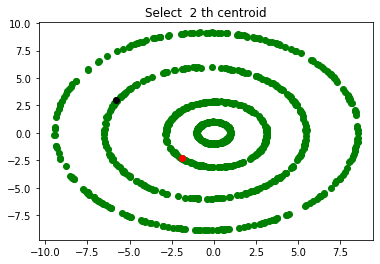

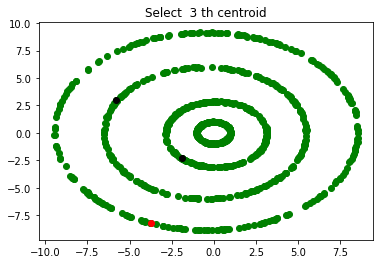

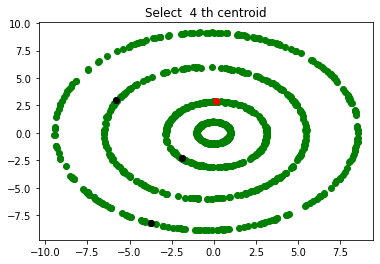

[[-0.43782079  0.52688704]
 [ 1.96872316  0.14409514]
 [ 1.03321126  1.12077476]
 [ 1.82946771 -0.40423334]]
[[ 0.47552906  0.04488644]
 [ 0.44346843  0.57969142]
 [-0.30448072  0.62546875]
 [ 0.47845626  0.30009676]]
[[ 0.74526951  0.07219743]
 [ 0.15214201  0.36127522]
 [-0.07653133  0.16181808]
 [ 0.79111914  0.70201351]]
[[ 0.58419815 -0.08990515]
 [ 0.20994476  0.02223856]
 [-0.03377871  0.06419372]
 [ 0.36540854  0.30760967]]
[[ 0.31657988 -0.15240801]
 [ 0.12540361 -0.02483959]
 [-0.04243395  0.02824398]
 [ 0.17225405  0.15292841]]
[[ 0.09568454 -0.0644724 ]
 [ 0.05377126 -0.00368944]
 [-0.03193059 -0.00387802]
 [ 0.07180406  0.09670163]]
[[ 0.0395139  -0.00461935]
 [ 0.02861305 -0.01556495]
 [-0.09998912  0.02205354]
 [ 0.04211382  0.06449818]]
[[ 0.02639927  0.02609129]
 [ 0.0154419  -0.00095224]
 [-0.04239905  0.03094589]
 [-0.02362719  0.03041113]]
[[ 0.          0.        ]
 [ 0.01061624 -0.02808289]
 [-0.10036641  0.024759  ]
 [ 0.          0.        ]]
[[ 0.          0.  

In [78]:
n_iter = 1000
centroids = initialize_kmeans_plus(X, k = 4)
for it in range(n_iter):
    clusters = cluster_assignment(X, centroids,n_clusters)
    previous_centroids = centroids.copy()
    centroids = update_centroids(X, clusters,n_clusters)
    diff = centroids - previous_centroids
    print(diff)
    if not diff.any():
        print("K-Means Converged")
        break